In [74]:
# 라이브러리 호출 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


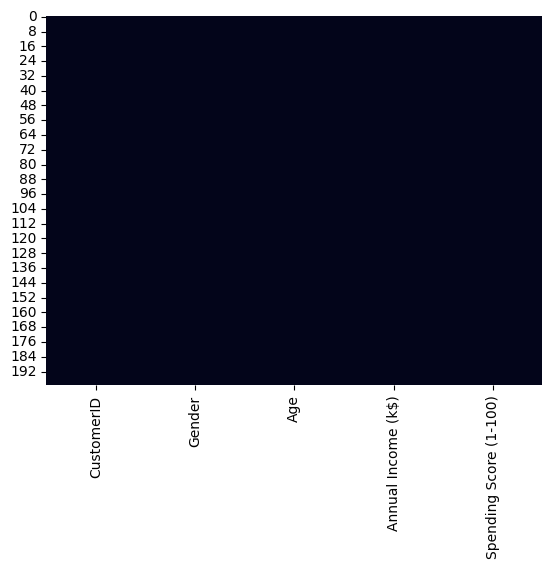

In [75]:
# 데이터셋 읽기
df = pd.read_csv("Mall_Customers.csv")

# 결측치 확인
print(df.isnull().sum())

# 히트맵으로 결측치 시각화
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# 모든 열의 결측치를 0으로 대체
df = df.fillna(0)

In [76]:
# 결과 확인
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [77]:
# 데이터 불러오기
df = pd.read_csv("Mall_Customers.csv")

# 스케일링할 특징 선택
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 스케일링
df[features] = scaler.fit_transform(df[features])

In [78]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061
196,197,Female,45,2.497807,-0.861839
197,198,Male,32,2.497807,0.923953
198,199,Male,32,2.917671,-1.250054


In [79]:
# 데이터 로드
data = pd.read_csv('Mall_Customers.csv')

# 필요한 열 선택 및 결측값 처리
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

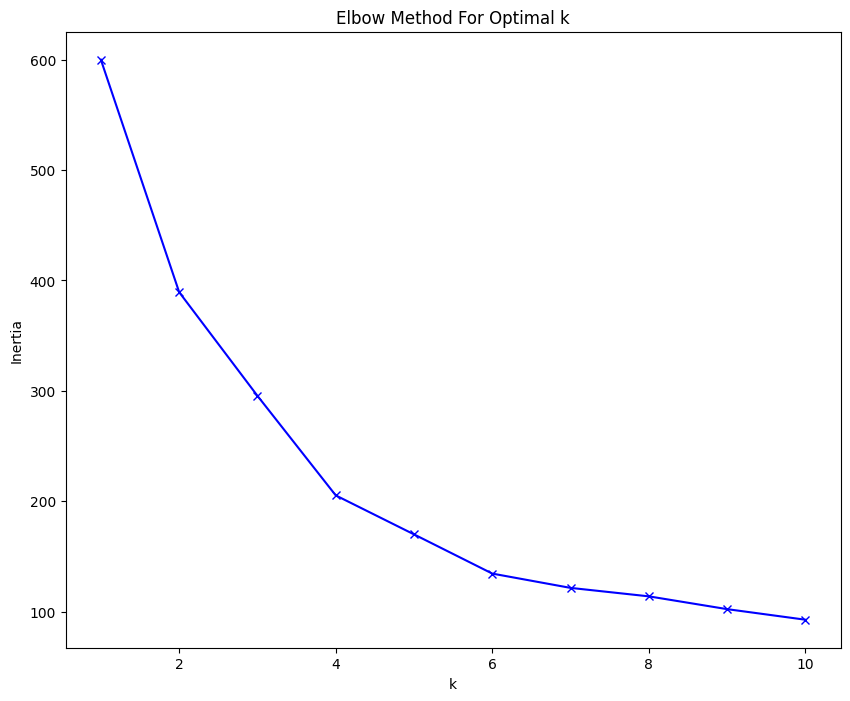

In [80]:
# 최적의 k 찾기 (엘보우 방법)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# 군집 결과 할당
data['Cluster'] = kmeans.labels_

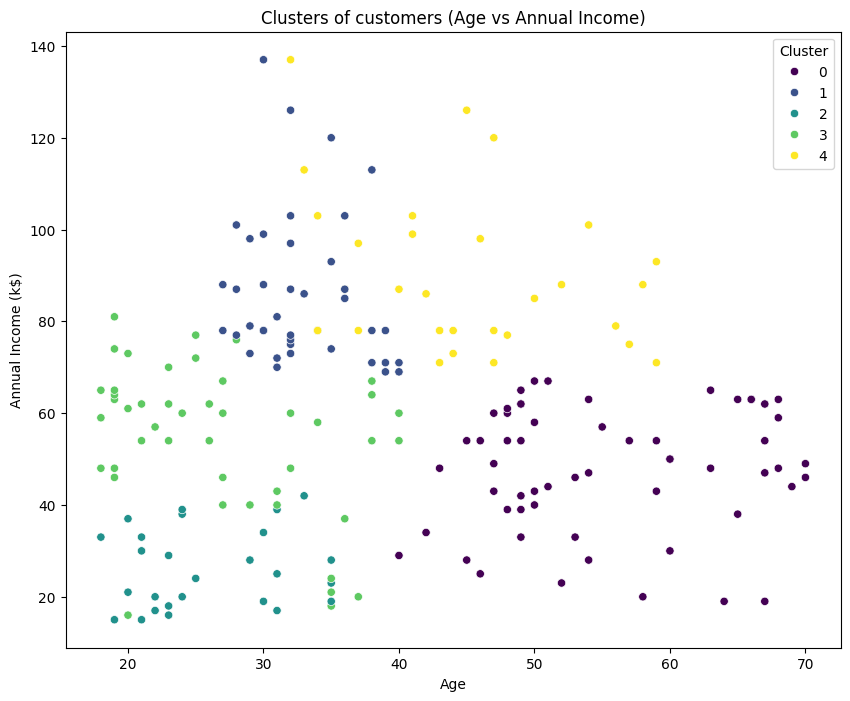

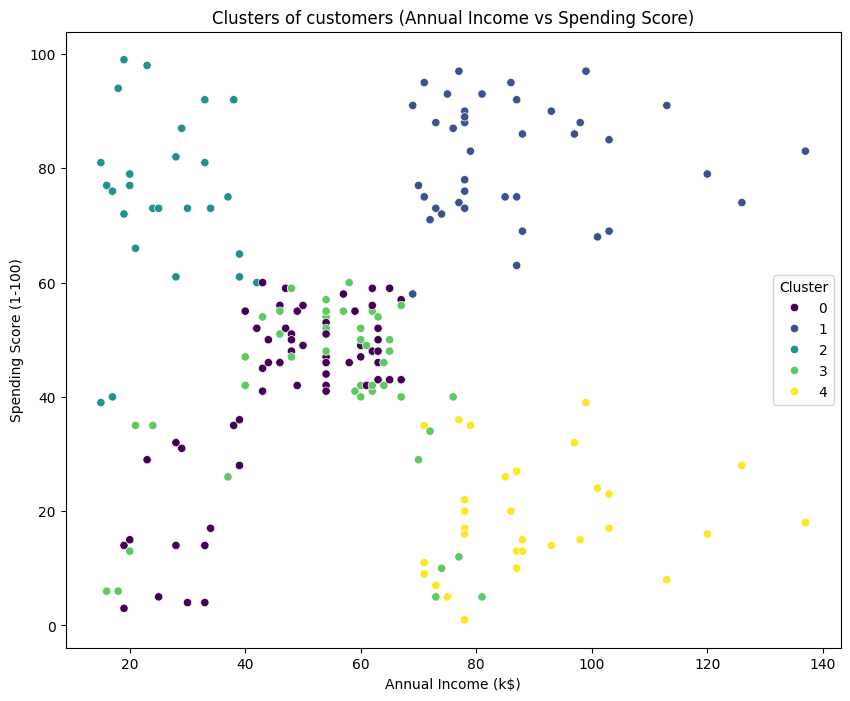

In [81]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

In [82]:
# 필요한 열만 선택
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
# 데이터 확인
data

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


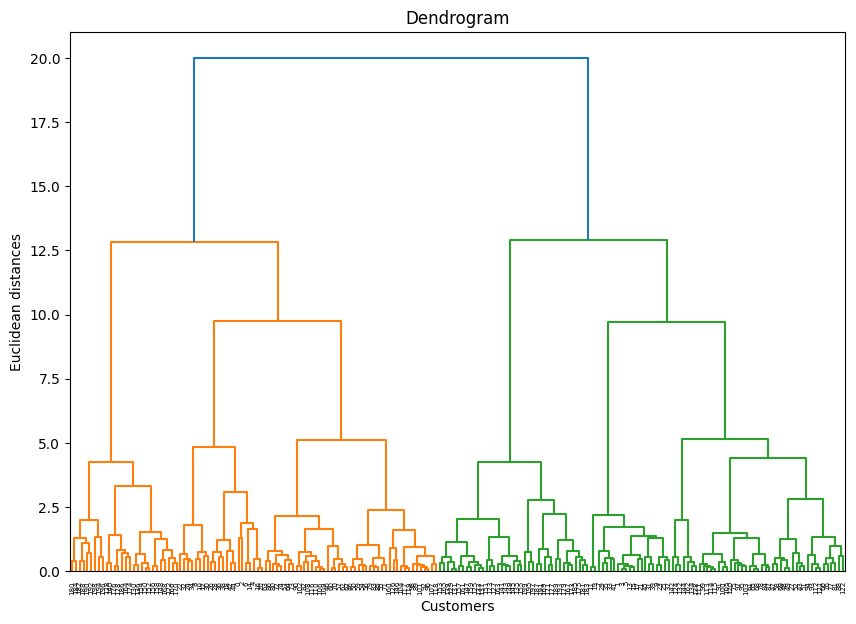

In [84]:
# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

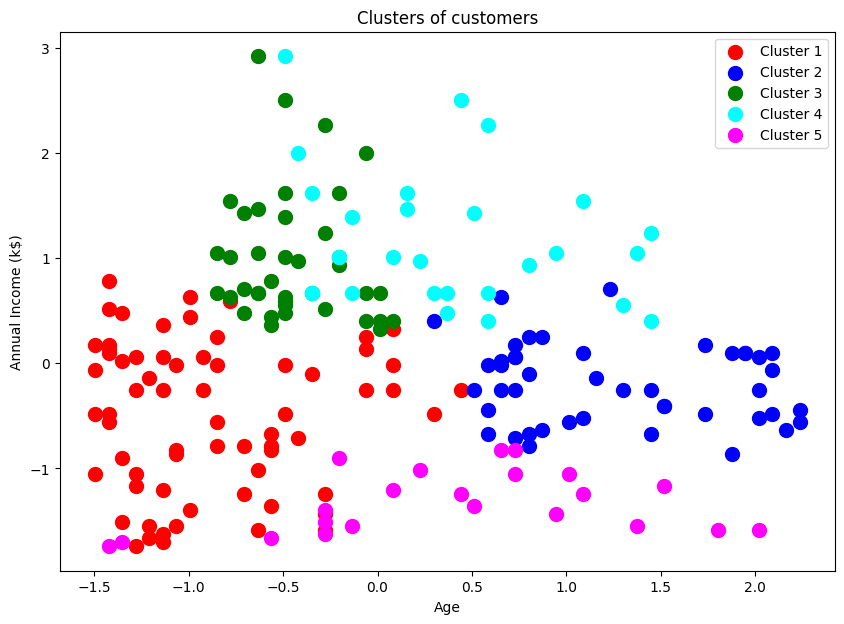

In [85]:
# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# 모델 학습 및 예측
y_hc = hc.fit_predict(X_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_hc == 3, 0], X_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_hc == 4, 0], X_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [86]:
# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39002826186267214


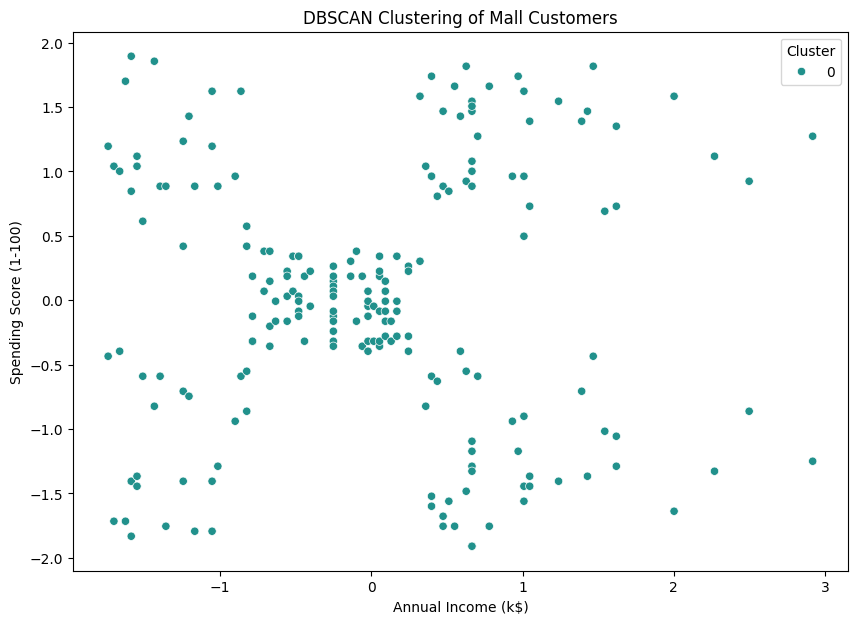

In [87]:
# DBSCAN 모델 생성
dbscan = DBSCAN(eps=5, min_samples=5)

# 모델 학습 및 예측
df['Cluster'] = dbscan.fit_predict(X)

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

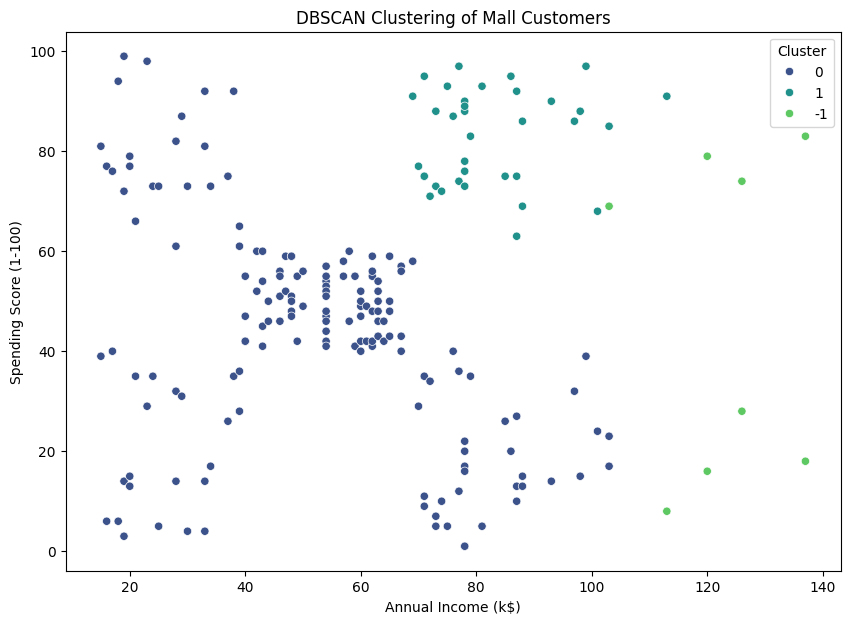

In [89]:
# Sample Data 
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(scaled_features)

df['Cluster'] = clusters
df['Cluster'] = df['Cluster'].astype(str)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()